In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Date_Fruit_Datasets.csv",low_memory=False)
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [3]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [4]:
df.dtypes

AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             object
dtype: object

In [5]:
df["Class"].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [6]:
df["Class"] = df["Class"].astype("category")
df["Class"].cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
893    6
894    6
895    6
896    6
897    6
Length: 898, dtype: int8

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
g.fit(x_train,y_train)

GaussianNB()

In [10]:
y_pred = g.predict(x_test)

In [11]:
accuracy_score(y_test, y_pred)

0.6037037037037037

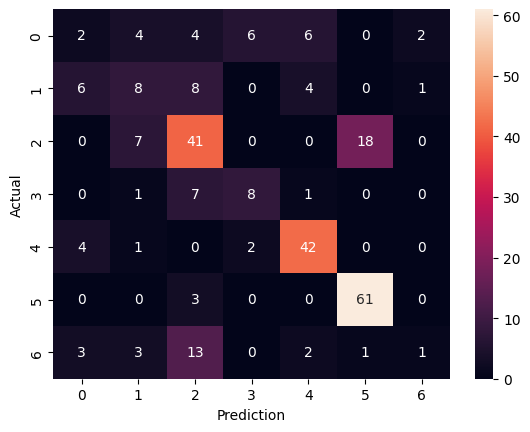

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()